In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
columns_name = ["age", "workclass", "fnlwgt","education","educationNum", \
            "maritalStatus", "occupation", "relationship", "race", "sex", "capitalGain", \
               "capitalLoss", "hoursPerWeek", "nativCcountry", "income"]

In [3]:
train_df = pd.read_csv('cansus_train.csv')
train_df.columns = columns_name
train_df.tail(1)

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativCcountry,income
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
train_df.shape

(32560, 15)

In [5]:
## https://www.kaggle.com/code/oucxxxx/adult-income-algorithm-from-scratch-no-sklearn
## https://www.kaggle.com/code/tirendazacademy/classification-analysis-with-xgboost
## https://rpubs.com/Net/IncomeLevelClassification#:~:text=Married%2Dciv%2Dspouse%20corresponds%20to,%2C%20Married%2DAF%2Dspouse.

In [6]:
test_df = pd.read_csv('cansus_test.csv',skiprows=1,header=None)
test_df.columns = columns_name
test_df.tail(2)

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativCcountry,income
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [7]:
test_df.shape

(16281, 15)

In [8]:
df = pd.concat([train_df, test_df],ignore_index=True)

In [9]:
df.shape

(48841, 15)

In [10]:
### Remove blank space from all columns in a dataframe
df_obj = df.select_dtypes(['object'])
rep_df = df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
rep_df = df.replace('?', np.nan)

In [11]:
rep_df.isnull().sum()

age                 0
workclass        2799
fnlwgt              0
education           0
educationNum        0
maritalStatus       0
occupation       2809
relationship        0
race                0
sex                 0
capitalGain         0
capitalLoss         0
hoursPerWeek        0
nativCcountry     857
income              0
dtype: int64

In [12]:
rep_df.shape

(48841, 15)

In [13]:
rep_df["workclass"].fillna(rep_df["workclass"].mode()[0], inplace = True)
rep_df["occupation"].fillna(rep_df["occupation"].mode()[0], inplace = True)
rep_df["nativCcountry"].fillna(rep_df["nativCcountry"].mode()[0], inplace = True)

In [14]:
rep_df.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
educationNum     0
maritalStatus    0
occupation       0
relationship     0
race             0
sex              0
capitalGain      0
capitalLoss      0
hoursPerWeek     0
nativCcountry    0
income           0
dtype: int64

In [15]:
# format output colmuns
rep_df['income'] = rep_df['income'].map({"<=50K.":0, ">50K.":1,"<=50K":0, ">50K":1})

In [16]:
## make school a good category 
rep_df['education'].replace(["Preschool", "1st-4th","5th-6th","7th-8th", \
                "9th","10th","11th","12th"], "Drop_at_school_label",inplace=True)
rep_df['education'].replace(["Some-college", "Assoc-voc","Assoc-acdm","7th-8th", \
                "9th","10th","11th","12th"],'College',inplace=True)

In [17]:
rep_df['maritalStatus'].replace(["Married-civ-spouse", "Married-AF-spouse"], "Married-spouse",inplace=True)

In [18]:
rep_df['nativCcountry'].replace(["Puerto-Rico", "El-Salvador", "Outlying-US(Guam-USVI-etc)"], "United-States",inplace=True)
rep_df['nativCcountry'].replace(["Jamaica", "Dominican-Republic","Guatemala", "Mexico","Canada", \
        "Cuba","Columbia","Haiti","Nicaragua","Peru","Ecuador", "Trinadad&Tobago", "Honduras"], \
        "Latin-America",inplace=True)
rep_df['nativCcountry'].replace(["Italy","Poland", "Portugal", "Greece","France", \
                "Yugoslavia", "Hungary", "Holand-Netherlands", "Germany"], "Europe",inplace=True)
rep_df['nativCcountry'].replace(["India", "China", "Japan","Vietnam","Taiwan", \
            "Iran", "Hong", "Thailand", "Cambodia", "Laos", "Philippines"], "Asia",inplace=True)
rep_df['nativCcountry'].replace(["Ireland", "England", "Scotland"], "England",inplace=True)

In [19]:
cat_clm = ["workclass", "education", \
            "maritalStatus", "occupation", "relationship", "race", "sex","nativCcountry"]
nul_clm = ["age","fnlwgt", "capitalGain","capitalLoss", "hoursPerWeek"]

In [20]:
cat_datafrm = rep_df[cat_clm]

In [21]:
one_hot = pd.get_dummies(cat_datafrm)

In [22]:
rep_df = rep_df.drop(cat_clm,axis=1)

In [23]:
rep_df.columns

Index(['age', 'fnlwgt', 'educationNum', 'capitalGain', 'capitalLoss',
       'hoursPerWeek', 'income'],
      dtype='object')

0.5575762169519219
-0.13214148770488562


<AxesSubplot:ylabel='Count'>

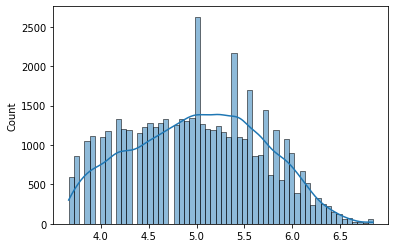

In [24]:
from scipy import stats
visual_clm = ['age', 'fnlwgt', 'educationNum', 'capitalGain', 'capitalLoss','hoursPerWeek']
print(rep_df['age'].skew())
print(np.log(rep_df['age']).skew())
boxage = stats.boxcox(rep_df['age'])
box_age = pd.Series(boxage[0])
sns.histplot(x=box_age,kde=True)

<AxesSubplot:>

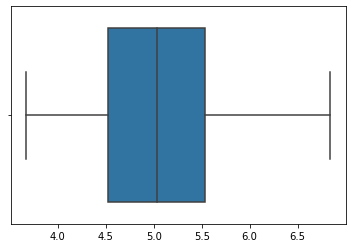

In [25]:
sns.boxplot(x=box_age)

1.4388862793258443
-0.8363874620602885


<AxesSubplot:ylabel='Count'>

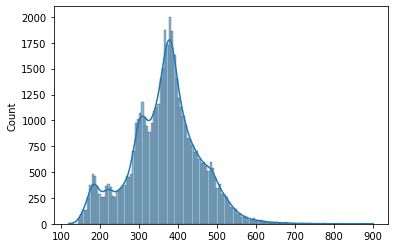

In [26]:
rep_df['age'] = box_age
visual_clm = ['age', 'fnlwgt', 'educationNum', 'capitalGain', 'capitalLoss','hoursPerWeek']
print(rep_df['fnlwgt'].skew())
print(np.log(rep_df['fnlwgt']).skew())
boxfnlwgt = stats.boxcox(rep_df['fnlwgt'])
boxfnlwgt = pd.Series(boxfnlwgt[0])
sns.histplot(x=boxfnlwgt,kde=True)

<AxesSubplot:>

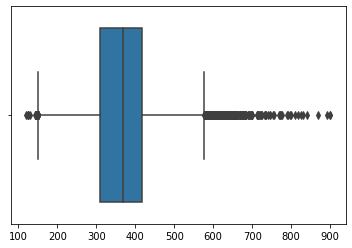

In [27]:
sns.boxplot(x=boxfnlwgt)

In [28]:
z = np.abs(stats.zscore(boxfnlwgt))
threshold = 3
z_fnl = np.where(z > 3)[0]
len(z_fnl)

158

<AxesSubplot:xlabel='fnlwgt'>

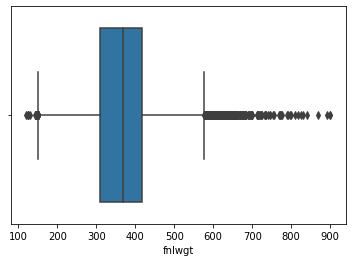

In [29]:
rep_df['fnlwgt'] = boxfnlwgt
sns.boxplot(x=rep_df['fnlwgt'])

In [30]:
#fnlwgt cutoff outlier is 850
rep_df= rep_df[rep_df['fnlwgt'] <= 800]

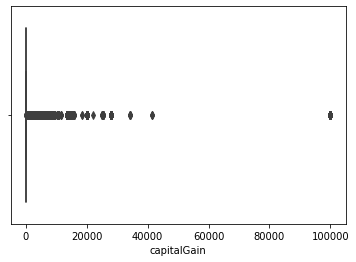

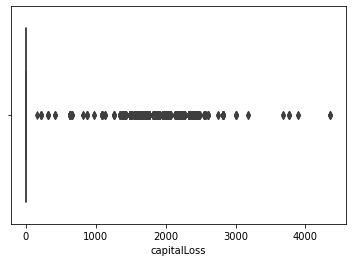

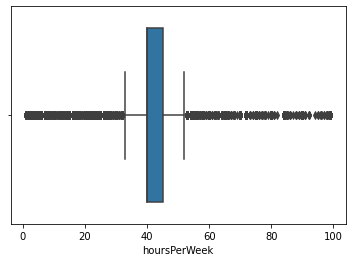

In [31]:
visual_clm = ['capitalGain', 'capitalLoss','hoursPerWeek']
for cl in visual_clm:
    fig,ax = plt.subplots()
    sns.boxplot(data=rep_df, x=cl)

In [32]:
rep_df= rep_df[rep_df['capitalGain'] <= 30000]
rep_df= rep_df[rep_df['capitalLoss'] <= 3000]
rep_df= rep_df[(rep_df['hoursPerWeek'] <= 80) & (rep_df['hoursPerWeek'] >= 10)]

In [33]:
one_hot = one_hot.iloc[rep_df.index]

In [34]:
rep_df = pd.concat([rep_df,one_hot],axis=1)

In [35]:
x = rep_df.drop(["income", "educationNum"], axis=1)

In [36]:
y = rep_df['income']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = x.iloc[0:32560, :], x.iloc[32560::, :], y[0:32560], y[32560::]

In [39]:
print(X_train.shape)
print(X_test.shape)

(32560, 59)
(14987, 59)


In [40]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [42]:
#https://slundberg.github.io/shap/notebooks/Census%20income%20classification%20with%20XGBoost.html
# https://www.kaggle.com/code/mattmet/income-prediction-xgboost-accuracy-86-02/notebook
# https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

# outlire handle very nice
## https://medium.com/analytics-vidhya/how-to-handle-outliers-in-machine-learning-5d8105c708e5

In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

In [44]:
model = XGBClassifier()
model.fit(X_train, y_train)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model, X_train, y_train, cv=kfold )
kf_cv_scores

array([0.86670762, 0.86087224, 0.86087224, 0.87653563, 0.87346437,
       0.86670762, 0.8737715 , 0.86762899, 0.88083538, 0.8762285 ])

In [45]:
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.87


In [46]:
ypred = model.predict(X_test)
cm = confusion_matrix(y_test,ypred)
print(cm)

[[10782   703]
 [ 1229  2273]]


In [47]:
# hyperparameter tuning
# xgboost with gridsearchcv
## https://www.mikulskibartosz.name/xgboost-hyperparameter-tuning-in-python-using-grid-search/
# estimator = XGBClassifier(
#     objective= 'binary:logistic',
#     nthread=4,
#     seed=42
# )
# parameters = {
#     'max_depth': range (2, 10, 1),
#     'n_estimators': range(60, 220, 40),
#     'learning_rate': [0.1, 0.01, 0.05]
# }
# grid_search = GridSearchCV(
#     estimator=estimator,
#     param_grid=parameters,
#     scoring = 'roc_auc',
#     n_jobs = 10,
#     verbose=True
# )
# grid_search.fit(X_train, y_train)

In [49]:
#grid_search.best_estimator_

In [50]:
model = XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)
model.fit(X_train, y_train)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.86


In [51]:
ypred = model.predict(X_test)
cm = confusion_matrix(y_test,ypred)
print(cm)

[[10972   513]
 [ 1562  1940]]
